# Udacity Data Scientist NanoDegree - Project 1 (Data Science Blog Post)

## Analyzing and Comparing Airbnb Housing Data (Seattle and Boston)

In this project, we will be using Airbnb Open Data in Seattle and Boston. Visualizations will follow to help the explanation and answer the 3 following questions. 

## Section 1 - Business Understanding

### Questions:

1. Which area (Between Seattle and Boston) has the highest housing rates? And what is the average difference between them?
2. Which area has more availability in general?
3. What are the times of the year (by month) where there is more availability in housing?

## Section 2 - Data Understanding

### Data Acquisition & Preparation from CSV files

In [18]:
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

seattle_data = pd.read_csv("Seattle_Airbnb_Calendar_Listing.csv")
boston_data = pd.read_csv("Boston_Airbnb_Calendar_Listing.csv")

In [33]:
# seattle_data.head()
# boston_data.head()
# seattle_data.shape
# boston_data.shape
# seattle_data.dtypes
# boston_data.dtypes
# seattle_data.isna().sum()
# boston_data.isna().sum()
# seattle_data.describe()
boston_data.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


We can conclude that: 
1. Both datasets row numbers are almost the same (less than 10% difference). 
2. Both datasets have the same columns with same data types (listing_id is int64, while date, available, and price are objects).
3. The only column having null variables are the prices in both datasets (459028 row in Seattle and 665853 row in Boston
4. stastistical data could be checked for each column by changing the last 2 rows of the previous cell.

### Function to clean the prices column

In [12]:
def clean_prices(col):
    '''
    INPUT
    col - the price column you wish to clean
    OUTPUT:
    col - the cleaned price column by removal of $ sign, comma and .00
    '''
    # removing the dollar sign, comma, and ".00" from the price column
    col = col.str.replace('$','')
    col = col.str.replace(',','')
    col = col.str.replace('.00','')
    
    # converting the price column from str to numeric to study
    col = pd.to_numeric(col, downcast='float')
    
    return col

## Data Preparation & Evaluation (for each question alone)

### 1. Analyzing Prices
since the dataset we're interested in analyzing is only related to price and availability, it doesn't make sense to keep the null row values. 

In [4]:
# Remove the rows having null values
seattle_edited = seattle_data.dropna()
boston_edited = boston_data.dropna()

After analyzing the data in the price column, we find out that the prices have a dollar sign and are strings formed with commas and periods, which will make it harder to find the average.
Moreover, we will find that there are prices that are $0, which doesn't make sense actually to our study - free accomodation. We will also proceed by removing them. 

In [13]:
# Cleaning the price column
seattle_edited["price"] = clean_prices(seattle_edited["price"])

# removing the zero values
seattle_edited = seattle_edited[seattle_edited.price != 0]


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [14]:
# Cleaning the price column
boston_edited["price"] = clean_prices(boston_edited["price"])

# removing the zero values
boston_edited = boston_edited[boston_edited.price != 0]

In [15]:
mean_price_sea = seattle_edited['price'].mean()
max_price_sea = seattle_edited['price'].max()
min_price_sea = seattle_edited['price'].min()

print(f"Seattle:\nThe mean price is {mean_price_sea} $\nThe min price is {min_price_sea} $\nThe max price is {max_price_sea} $")

Seattle:
The mean price is 132.53591918945312 $
The min price is 10.0 $
The max price is 1650.0 $


In [16]:
mean_price_bos = boston_edited['price'].mean()
max_price_bos = boston_edited['price'].max()
min_price_bos = boston_edited['price'].min()

print(f"Boston:\nThe mean price is {mean_price_bos} $\nThe min price is {min_price_bos} $\nThe max price is {max_price_bos} $")

Boston:
The mean price is 188.2623291015625 $
The min price is 1.0 $
The max price is 7163.0 $


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

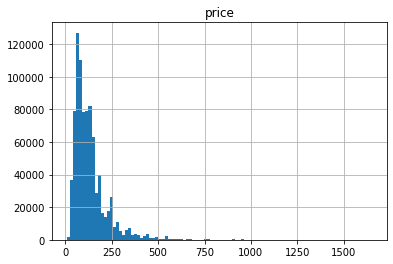

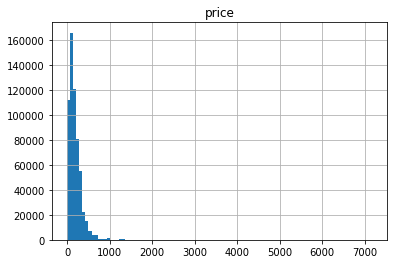

In [17]:
# Visualizing Seattle's prices
seattle_edited.hist(column='price', bins=100)

# Visualizing Boston's prices
boston_edited.hist(column='price', bins=100)

Boston in general has higher prices than Seattle which is clearly seen from the graph analysis. 
The average difference is around 55\\$. While the maximum price shows a huge difference (1650\\$ in Seattle vs 7163\\$ in Boston)

### 2. Analyzing General Availability
Analyzing the avalability column, we can find that our edited dataset only includes the available apartments, which shows that our decision of eliminating the rows was wrong. This is why we will use the original dataset for the next section

In [116]:
seattle_data['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

<AxesSubplot:title={'center':'Seattle Availability'}>

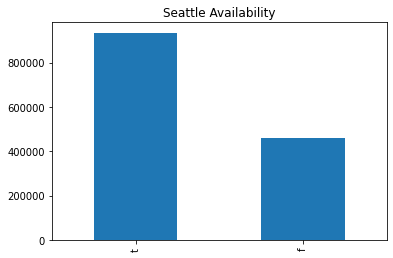

In [117]:
# Visualizing Seattle's availability
seattle_data['available'].value_counts().plot(kind='bar', 
                                     title='Seattle Availability')

In [118]:
boston_data['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

<AxesSubplot:title={'center':'Boston Availability'}>

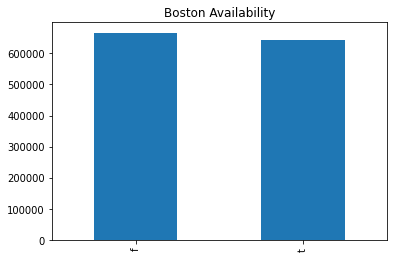

In [119]:
# Visualizing Boston's availability
boston_data['available'].value_counts().plot(kind='bar', 
                                     title='Boston Availability')

Boston has more availability, around 50%, while the availability in Seattle is around 33%

### 3. Analyzing Availability based on months of the year

In [120]:
seattle_available = seattle_data.loc[seattle_data['available'] == 't'].dropna()
boston_available = boston_data.loc[boston_data['available'] == 't'].dropna()

Now we will need to reformat the string date to an actual datetime date with only YYYY-MM format to analyze

In [121]:
seattle_available['date_YYYY_MM'] = pd.to_datetime(seattle_available['date'], format='%Y-%m').dt.strftime('%Y-%m')

seattle_available['date_YYYY_MM'].value_counts()

2016-12    87061
2016-03    83938
2016-10    82438
2016-11    81780
2016-05    79971
2016-09    77246
2016-06    77244
2016-08    76347
2016-04    76037
2016-07    74222
2016-02    73321
2016-01    59239
2017-01     5698
Name: date_YYYY_MM, dtype: int64

<AxesSubplot:title={'center':'Seattle Availability'}>

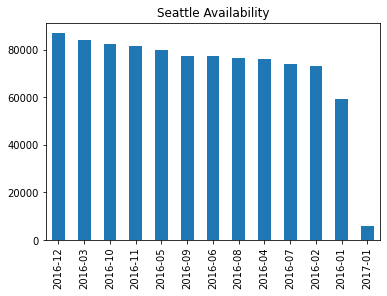

In [122]:
seattle_available['date_YYYY_MM'].value_counts().plot(kind='bar', title='Seattle Availability')

In [123]:
boston_available['date_YYYY_MM'] = pd.to_datetime(boston_available['date'], format='%Y-%m').dt.strftime('%Y-%m')

boston_available['date_YYYY_MM'].value_counts()

2017-01    63181
2016-12    60997
2016-11    58888
2017-02    56810
2017-08    55561
2017-03    55181
2017-07    54963
2017-05    53600
2017-06    52731
2017-04    51382
2016-10    46345
2016-09    24401
2017-09     8997
Name: date_YYYY_MM, dtype: int64

<AxesSubplot:title={'center':'Boston Availability'}>

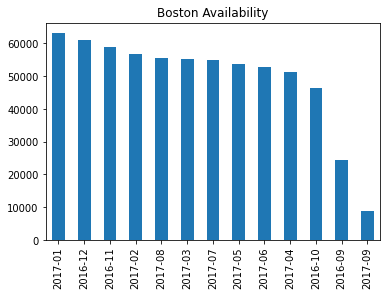

In [124]:
boston_available['date_YYYY_MM'].value_counts().plot(kind='bar', title='Boston Availability')

Housing availability decreased proceeding with the months of the years.

### Conclusion

This notebook contains the analysis of Airbnb housing in Seattle and Boston areas. The answers of the 3 questions asked at the start of the notebook are:
1. Boston in general has higher prices than Seattle. The average difference is around 55\\$. While the maximum price shows a huge difference (1650\\$ in Seattle vs 7163\\$ in Boston)
2. In general Boston has more availability, around 50%, while the availability in Seattle is around 33%
3. Disregarding the January month of 2017 which might be an outlier with less data, we can conclude that at all time of the years there is more housing availability in Seattle, and in both Seattle and Boston, the availability goes down in a small percentage moving forward into the year.